The following notebook will explore any trends between the air quality data and the weather data. Both datasets contain hourly measurements.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# read in cleaned weather and air quality files
AQ_data = pd.read_csv('FarmingtonCommunityHall_AQ.csv')
weather_data = pd.read_csv('weather_data.csv')

# drop the WDIR_UVEC_(DEG) column
weather_data.drop('WDIR_UVEC_(DEG)', axis=1, inplace=True)

# combine cleaned file into one dataframe
AQ_weather_hourly = weather_data.merge(right=AQ_data,
                                     how='inner')
# Reset DateTimeIndex
AQ_weather_hourly = AQ_weather_hourly.set_index(pd.DatetimeIndex(AQ_weather_hourly['Datetime']))
# view combined df
AQ_weather_hourly.head()

,Datetime,TEMP_MEAN_(C),WDIR_VECT_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%),NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,,,,,,
2019-01-01 01:00:00,2019-01-01 01:00:00,0.8,272.7,10.0,67.1,1.2,0.4,0.20,1.00,0.7,37.60
2019-01-01 02:00:00,2019-01-01 02:00:00,0.8,274.6,8.8,66.8,0.9,0.3,0.15,0.75,0.4,37.85
2019-01-01 03:00:00,2019-01-01 03:00:00,1.2,274.9,8.4,66.0,0.6,0.2,0.10,0.50,0.1,38.10
2019-01-01 04:00:00,2019-01-01 04:00:00,0.7,268.3,7.7,68.6,1.7,0.1,0.10,1.60,0.0,36.70
2019-01-01 05:00:00,2019-01-01 05:00:00,1.1,263.5,10.4,69.6,0.5,0.1,0.10,0.30,0.0,37.90


In [14]:
# Create daily, weekly, and monthly resempled dfs for analysis
AQ_weather_daily = AQ_weather_hourly.resample('D').mean()
AQ_weather_weekly = AQ_weather_hourly.resample('w').mean()
AQ_weather_monthly = AQ_weather_hourly.resample('M').mean()

# view df
AQ_weather_weekly.head()

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%),NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,,,,,
2019-01-06,-5.158333,239.749306,3.954861,76.644444,3.440625,0.475694,0.445833,2.994444,0.182292,30.605903
2019-01-13,-12.929167,220.981548,1.051190,78.722024,10.941369,0.383929,2.113690,8.827381,0.139881,20.625000
2019-01-20,-12.282738,159.645833,1.997619,80.975000,5.092560,0.544345,0.628869,4.474107,0.135417,25.852976
2019-01-27,-3.329762,275.419048,4.791667,69.748214,4.191667,0.235119,1.001488,3.187798,0.130655,32.128571
2019-02-03,-16.185119,230.274405,2.914286,70.238095,3.732143,0.426786,0.700893,3.034226,0.124702,31.468155


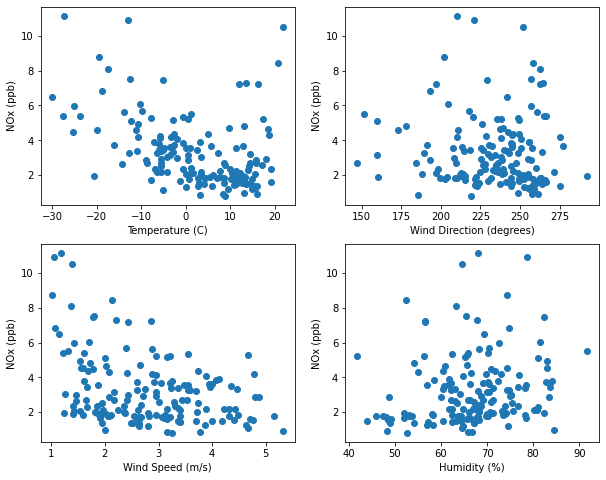

In [20]:
# Plot scatter plot of weekly data for NOx vs all weather parameters
y = AQ_weather_weekly['NOx']
x1 = AQ_weather_weekly['TEMP_MEAN_(C)']
x2 = AQ_weather_weekly['WDIR_VECT_(DEG)']
x3 = AQ_weather_weekly['WSPD_SCLR_(M/S)']
x4 = AQ_weather_weekly['HUMIDITY_(%)']

fig, axs = plt.subplots(2,2, figsize=(10,8))
axs[0,0].scatter(x1,y)
axs[0,0].set_xlabel('Temperature (C)')
axs[0,0].set_ylabel('NOx (ppb)')
axs[0,1].scatter(x2,y)
axs[0,1].set_xlabel('Wind Direction (degrees)')
axs[0,1].set_ylabel('NOx (ppb)')
axs[1,0].scatter(x3,y)
axs[1,0].set_xlabel('Wind Speed (m/s)')
axs[1,0].set_ylabel('NOx (ppb)')
axs[1,1].scatter(x4,y)
axs[1,1].set_xlabel('Humidity (%)')
axs[1,1].set_ylabel('NOx (ppb)')

plt.show()

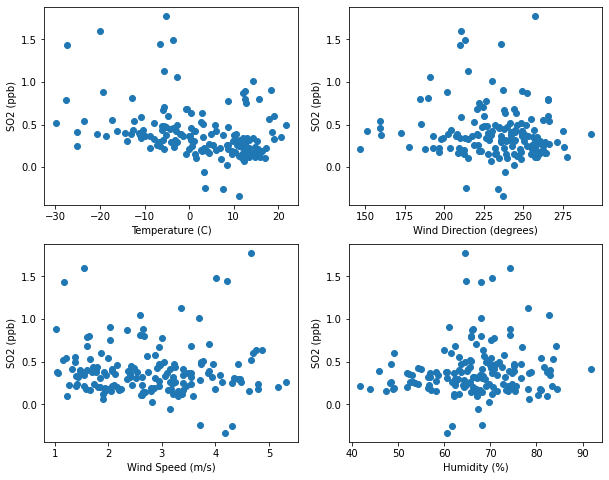

In [22]:
# Plot scatter plot of weekly data for SO2 vs all weather parameters

y = AQ_weather_weekly['SO2']

fig, axs = plt.subplots(2,2, figsize=(10,8))

axs[0,0].scatter(x1,y)
axs[0,0].set_xlabel('Temperature (C)')
axs[0,0].set_ylabel('SO2 (ppb)')
axs[0,1].scatter(x2,y)
axs[0,1].set_xlabel('Wind Direction (degrees)')
axs[0,1].set_ylabel('SO2 (ppb)')
axs[1,0].scatter(x3,y)
axs[1,0].set_xlabel('Wind Speed (m/s)')
axs[1,0].set_ylabel('SO2 (ppb)')
axs[1,1].scatter(x4,y)
axs[1,1].set_xlabel('Humidity (%)')
axs[1,1].set_ylabel('SO2 (ppb)')

plt.show()

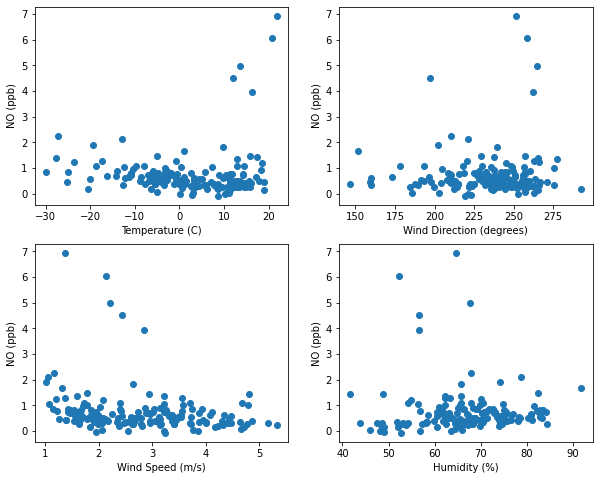

In [23]:
# Plot scatter plot of weekly data for NO vs all weather parameters

y = AQ_weather_weekly['NO']

fig, axs = plt.subplots(2,2, figsize=(10,8))

axs[0,0].scatter(x1,y)
axs[0,0].set_xlabel('Temperature (C)')
axs[0,0].set_ylabel('NO (ppb)')
axs[0,1].scatter(x2,y)
axs[0,1].set_xlabel('Wind Direction (degrees)')
axs[0,1].set_ylabel('NO (ppb)')
axs[1,0].scatter(x3,y)
axs[1,0].set_xlabel('Wind Speed (m/s)')
axs[1,0].set_ylabel('NO (ppb)')
axs[1,1].scatter(x4,y)
axs[1,1].set_xlabel('Humidity (%)')
axs[1,1].set_ylabel('NO (ppb)')

plt.show()

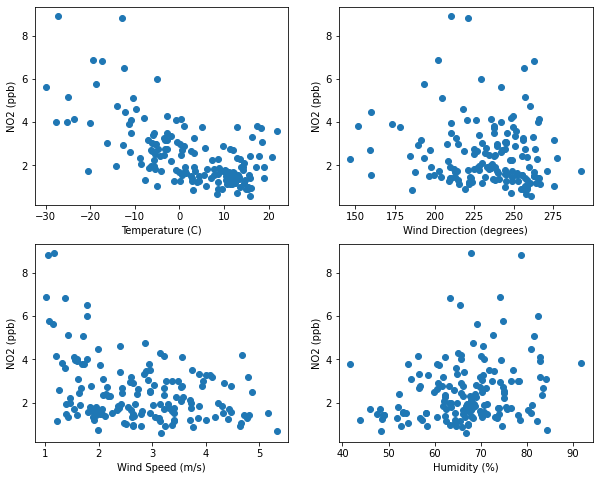

In [24]:
# Plot scatter plot of weekly data for NO2 vs all weather parameters

y = AQ_weather_weekly['NO2']

fig, axs = plt.subplots(2,2, figsize=(10,8))

axs[0,0].scatter(x1,y)
axs[0,0].set_xlabel('Temperature (C)')
axs[0,0].set_ylabel('NO2 (ppb)')
axs[0,1].scatter(x2,y)
axs[0,1].set_xlabel('Wind Direction (degrees)')
axs[0,1].set_ylabel('NO2 (ppb)')
axs[1,0].scatter(x3,y)
axs[1,0].set_xlabel('Wind Speed (m/s)')
axs[1,0].set_ylabel('NO2 (ppb)')
axs[1,1].scatter(x4,y)
axs[1,1].set_xlabel('Humidity (%)')
axs[1,1].set_ylabel('NO2 (ppb)')

plt.show()

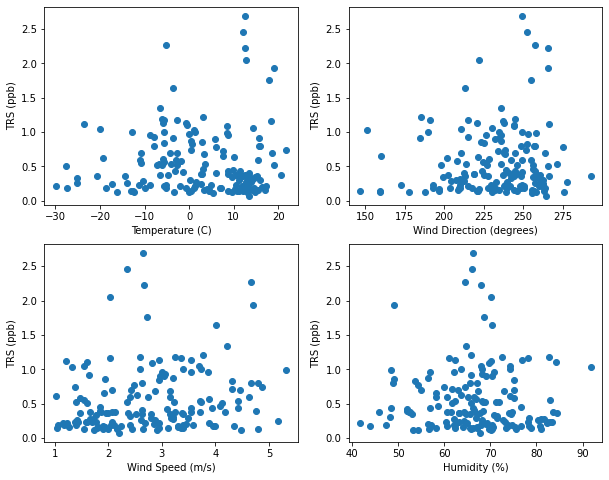

In [25]:
# Plot scatter plot of weekly data for TRS vs all weather parameters

y = AQ_weather_weekly['TRS']

fig, axs = plt.subplots(2,2, figsize=(10,8))

axs[0,0].scatter(x1,y)
axs[0,0].set_xlabel('Temperature (C)')
axs[0,0].set_ylabel('TRS (ppb)')
axs[0,1].scatter(x2,y)
axs[0,1].set_xlabel('Wind Direction (degrees)')
axs[0,1].set_ylabel('TRS (ppb)')
axs[1,0].scatter(x3,y)
axs[1,0].set_xlabel('Wind Speed (m/s)')
axs[1,0].set_ylabel('TRS (ppb)')
axs[1,1].scatter(x4,y)
axs[1,1].set_xlabel('Humidity (%)')
axs[1,1].set_ylabel('TRS (ppb)')

plt.show()

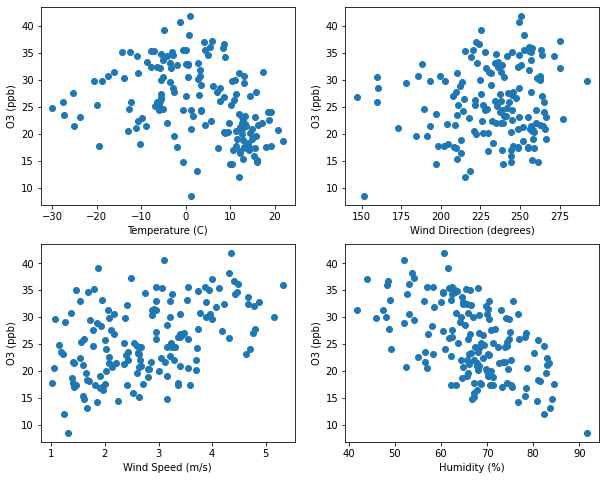

In [26]:
# Plot scatter plot of weekly data for O3 vs all weather parameters

y = AQ_weather_weekly['O3']

fig, axs = plt.subplots(2,2, figsize=(10,8))

axs[0,0].scatter(x1,y)
axs[0,0].set_xlabel('Temperature (C)')
axs[0,0].set_ylabel('O3 (ppb)')
axs[0,1].scatter(x2,y)
axs[0,1].set_xlabel('Wind Direction (degrees)')
axs[0,1].set_ylabel('O3 (ppb)')
axs[1,0].scatter(x3,y)
axs[1,0].set_xlabel('Wind Speed (m/s)')
axs[1,0].set_ylabel('O3 (ppb)')
axs[1,1].scatter(x4,y)
axs[1,1].set_xlabel('Humidity (%)')
axs[1,1].set_ylabel('O3 (ppb)')

plt.show()

In [ ]:
# Correlation heatmap using hourly data

In [ ]:
# Correlation heatmap using daily data

In [ ]:
# Correlation heatmap using weekly data

In [ ]:
# Correlation heatmap using monthly data